684. Redundant Connection

In this problem, a tree is an undirected graph that is connected and has no cycles.

You are given a graph that started as a tree with n nodes labeled from 1 to n, with one additional edge added. The added edge has two different vertices chosen from 1 to n, and was not an edge that already existed. The graph is represented as an array edges of length n where edges[i] = [ai, bi] indicates that there is an edge between nodes ai and bi in the graph.

Return an edge that can be removed so that the resulting graph is a tree of n nodes. If there are multiple answers, return the answer that occurs last in the input.

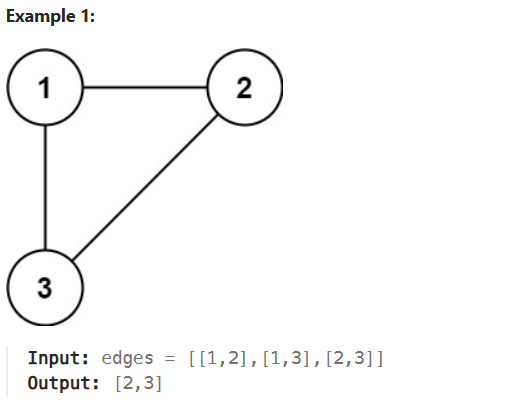

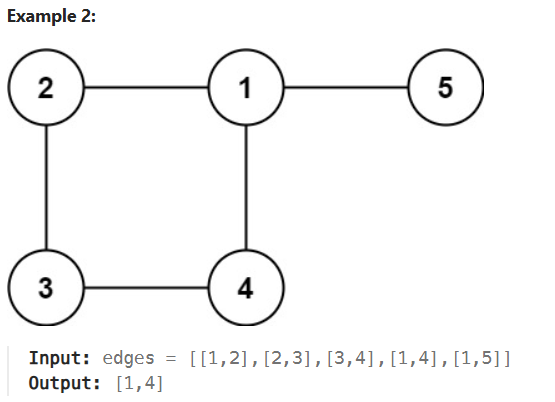

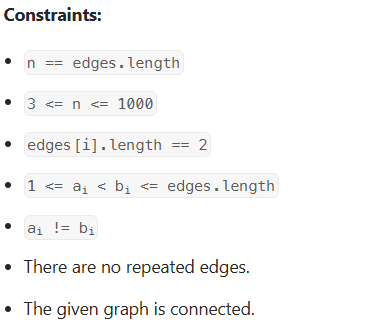

In [28]:
class DSU:
    def __init__(self, v_amount):
        self.parent = list(range(v_amount + 1 ))
        self.rank = [1]*(v_amount + 1)

    def find(self, v):
        if self.parent[v] != v:
            self.parent[v] = self.find(self.parent[v])

        return self.parent[v]

    def union(self, x, y):
        rootX = self.find(x)
        rootY = self.find(y)
        
        if self.rank[rootX] > self.rank[rootY]:
            self.parent[rootY] = rootX
            self.rank[rootX] += 1

        elif self.rank[rootY] > self.rank[rootX]:
            self.parent[rootX] = rootY
            self.rank[rootY] += 1

        else: # rankX == rankY
            self.parent[rootY] = rootX
            self.rank[rootX] += 1


class Solution(object):
    def findRedundantConnection(self, edges):
        """
        :type edges: List[List[int]]
        :rtype: List[int]
        """
        dsu = DSU(len(edges) + 1)
        for v1,v2 in edges:
            if dsu.find(v1) == dsu.find(v2):
                return [v1,v2]
            dsu.union(v1,v2)

        return []

In [8]:
edges = [[1,2],[2,3],[3,4],[1,4],[1,5]]
# Output: [1,4]

In [ ]:
# Development

In [16]:
class DSU:
    def __init__(self, v_amount):
        self.parent = list(range(v_amount + 1 ))
        self.rank = [1]*(v_amount + 1)

    def find(self, v):
        if self.parent[v] != v:
            self.parent[v] = self.find(self.parent[v])

        return self.parent[v]

    def union(self, x, y):
        rootX = self.find(x)
        rootY = self.find(y)
        

        if rootX == rootY: # attempt to merge vertices from the same component
            return False

        if self.rank[rootX] > self.rank[rootY]:
            self.parent[rootY] = rootX
            self.rank[rootX] += 1

        elif self.rank[rootY] > self.rank[rootX]:
            self.parent[rootX] = rootY
            self.rank[rootY] += 1

        else: # rankX == rankY
            self.parent[rootY] = rootX
            self.rank[rootX] += 1

        return True


In [22]:
def find_redundant(edges):
    dsu = DSU(len(edges) + 1)
    for v1,v2 in edges:
        if not dsu.union(v1,v2):
            # print(dsu.parent)
            return [v1,v2]
    
find_redundant(edges)

[1, 4]